In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

In [13]:
df = load_digits()
data = df.data
features = df.feature_names
targets = df.target

In [35]:
# converting data into a dataframe
df = pd.DataFrame(data=data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [38]:
y = pd.Series(targets)
y.tail()

1792    9
1793    0
1794    8
1795    9
1796    8
dtype: int32

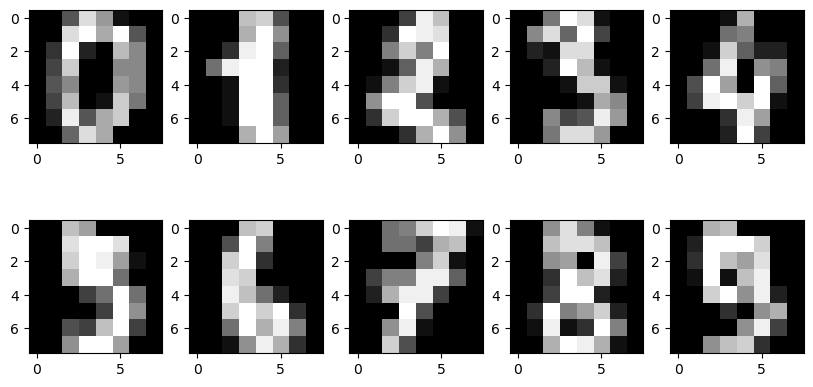

In [34]:
# plotting a single digit
fig,ax = plt.subplots(2,5,figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(df.iloc[i,:].values.reshape(8,8),cmap='gray')

In [44]:
scdf = StandardScaler().fit_transform(df)
scdf[:1,:]

array([[ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
        -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
        -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
        -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
         0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
         1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
        -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
        -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
         0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
         1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
        -0.36677122, -1.14664746, -0.5056698 , -0.19600752]])

In [49]:
# covariance matrix

covmat = np.cov(scdf.T) #np.cov takes the rows as variables and columns as observations
covmat.shape

(64, 64)

In [92]:
# finding the eigenvalues and eigenvectors
ev, evec = np.linalg.eig(covmat)

In [105]:
#the order of the eigenvectors
order = np.argsort(ev)
ordev =np.take(ev,order[::-1])

np.cumsum(ordev*100/np.sum(ordev))[:40] # we hit 95% explained variance at index 40

array([12.0339161 , 21.5949705 , 30.03938539, 36.5377933 , 41.39794818,
       45.61206805, 49.55415085, 52.94353177, 55.94175279, 58.87375534,
       61.6555608 , 64.23261589, 66.50791921, 68.73509895, 70.90032838,
       72.81449499, 74.59004207, 76.22811135, 77.82457152, 79.3137627 ,
       80.66173227, 81.93366364, 83.09950099, 84.15714759, 85.13246353,
       86.07702252, 86.94003635, 87.77667921, 88.57437245, 89.32084382,
       90.04642598, 90.73833722, 91.39224576, 92.03303833, 92.62442244,
       93.19558485, 93.71922165, 94.20102924, 94.6547485 , 95.07791125])

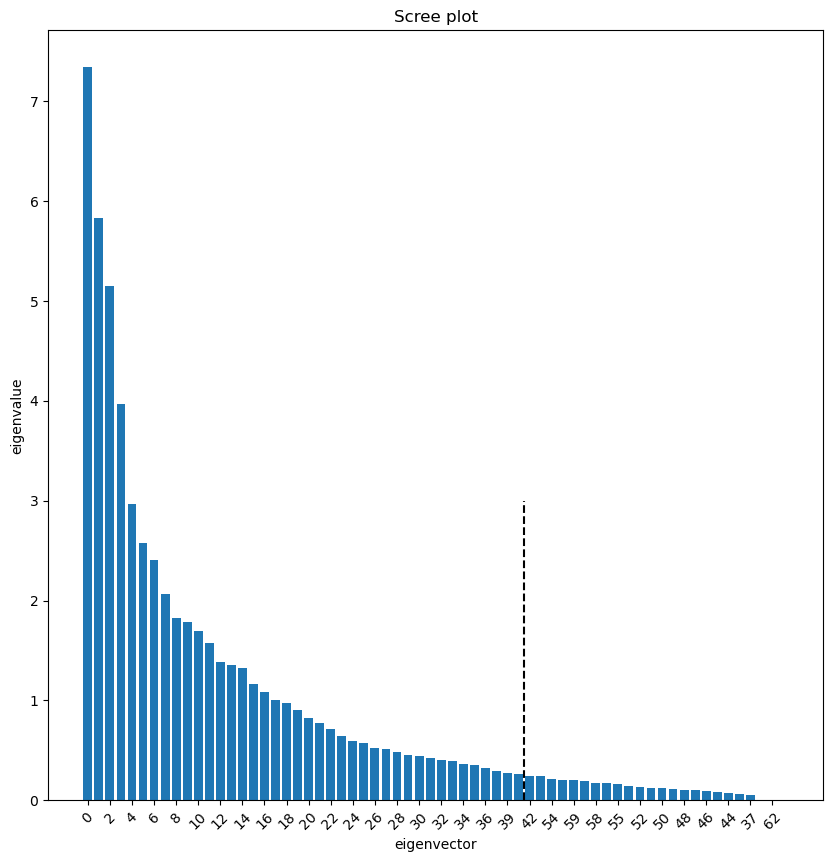

In [103]:
# scree plot
lab_ev = pd.DataFrame(index=np.arange(1,65),data=ev,columns=['ev'])

fig,ax = plt.subplots(figsize=(10,10))
ax.bar(x=np.arange(1,65),height=ordev)
ax.plot(np.repeat(40.5,3),np.linspace(0,3,3),ls='--',color='k')
ax.set_xticks(np.arange(1,65,2))
ax.set_xticklabels(labels=order[::-2],rotation=45)
ax.set_title('Scree plot')
ax.set_ylabel('eigenvalue')
ax.set_xlabel('eigenvector')

plt.show()

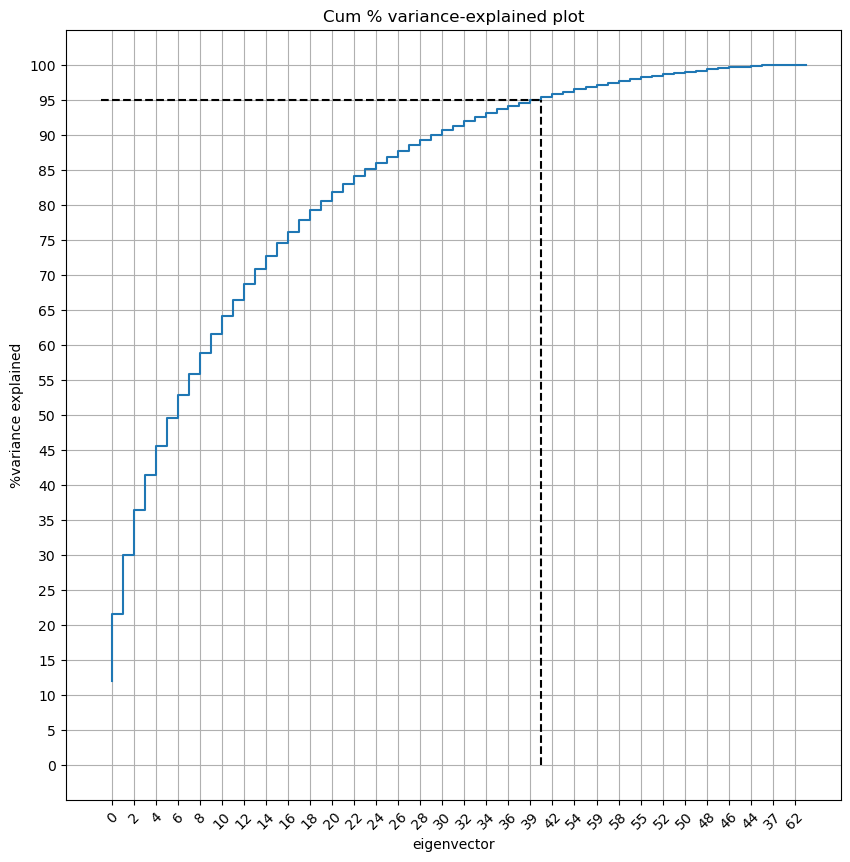

In [117]:
# the cumulative variance
fig,ax = plt.subplots(figsize=(10,10))
ax.step(np.arange(1,65),np.cumsum(ordev*100/np.sum(ordev)))
ax.plot(np.repeat(40,3),np.linspace(0,95,3),ls='--',color='k')
ax.plot(np.linspace(0,40,3),np.repeat(95,3),ls='--',color='k')
ax.set_xticks(np.arange(1,65,2))
ax.set_xticklabels(labels=order[::-2],rotation=45)
ax.set_yticks(np.arange(0,101,5))
ax.grid(True)
ax.set_title('Cum % variance-explained plot')
ax.set_ylabel('%variance explained')
ax.set_xlabel('eigenvector')

plt.show()

In [126]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=.2,random_state=69)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep=',')

(1437, 64),(360, 64),(1437,),(360,)


In [139]:
# performing PCA
pca = PCA(n_components=40)

PXTr = pca.fit_transform(X_train)
PXTr.shape

(1437, 40)

In [140]:
# applying the transformation to the test dataset
PXTe=pca.transform(X_test)
PXTe.shape

(360, 40)

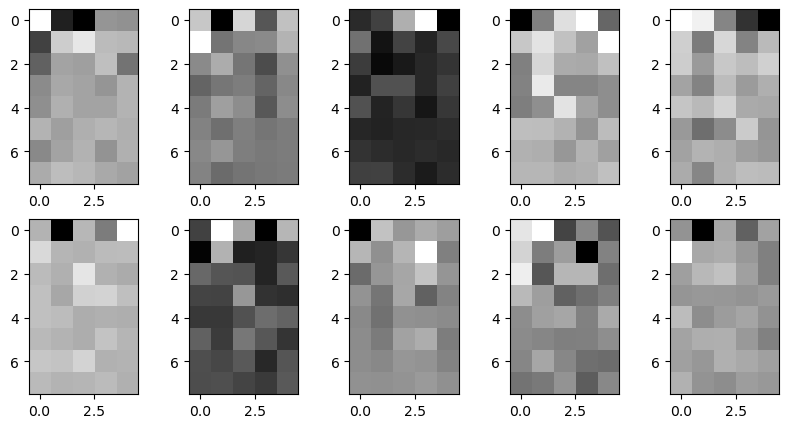

In [141]:
#plotting the data
# plotting a single digit
fig,ax = plt.subplots(2,5,figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(PXTr[i,:].reshape(8,5),cmap='gray')

In [164]:
# creating a decision tree
dtc = DecisionTreeClassifier(max_depth=25)

dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25)

In [165]:
# predictions with the dtc
y_pred = dtc.predict(X_test)

print(f'The accuracy score is: {accuracy_score(y_test,y_pred)}')

The accuracy score is: 0.825


In [166]:
# the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.69      0.71      0.70        28
           2       0.85      0.78      0.82        37
           3       0.76      0.89      0.82        35
           4       0.85      0.77      0.80        43
           5       0.87      0.81      0.84        32
           6       0.90      0.95      0.93        39
           7       0.83      0.79      0.81        38
           8       0.79      0.82      0.81        38
           9       0.80      0.80      0.80        40

    accuracy                           0.82       360
   macro avg       0.82      0.83      0.82       360
weighted avg       0.83      0.82      0.82       360



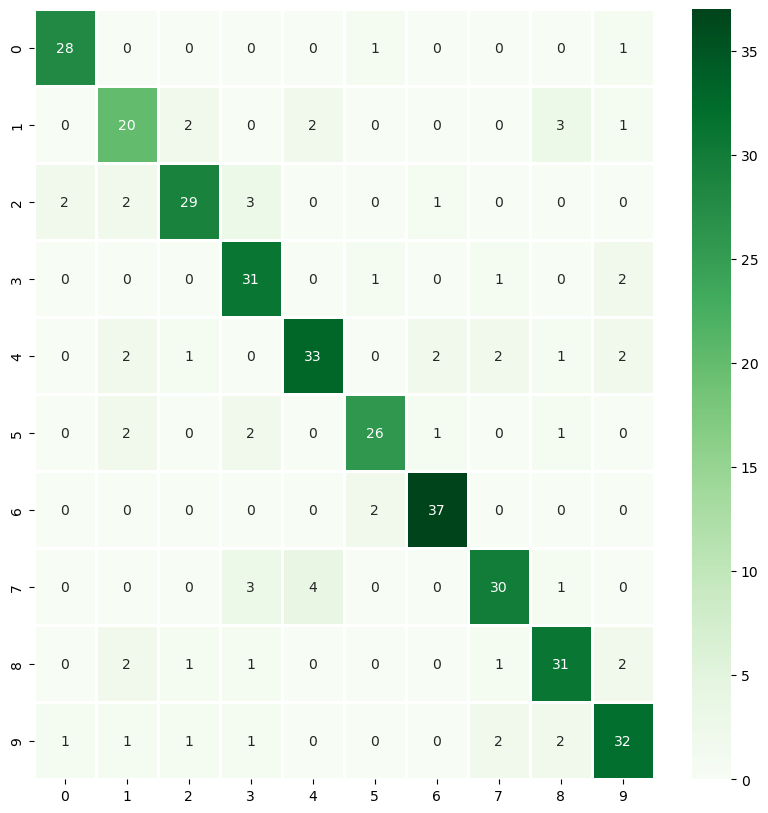

In [170]:
# the confusion matrix
plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),linewidth=2,cmap='Greens',annot=True)
plt.show()

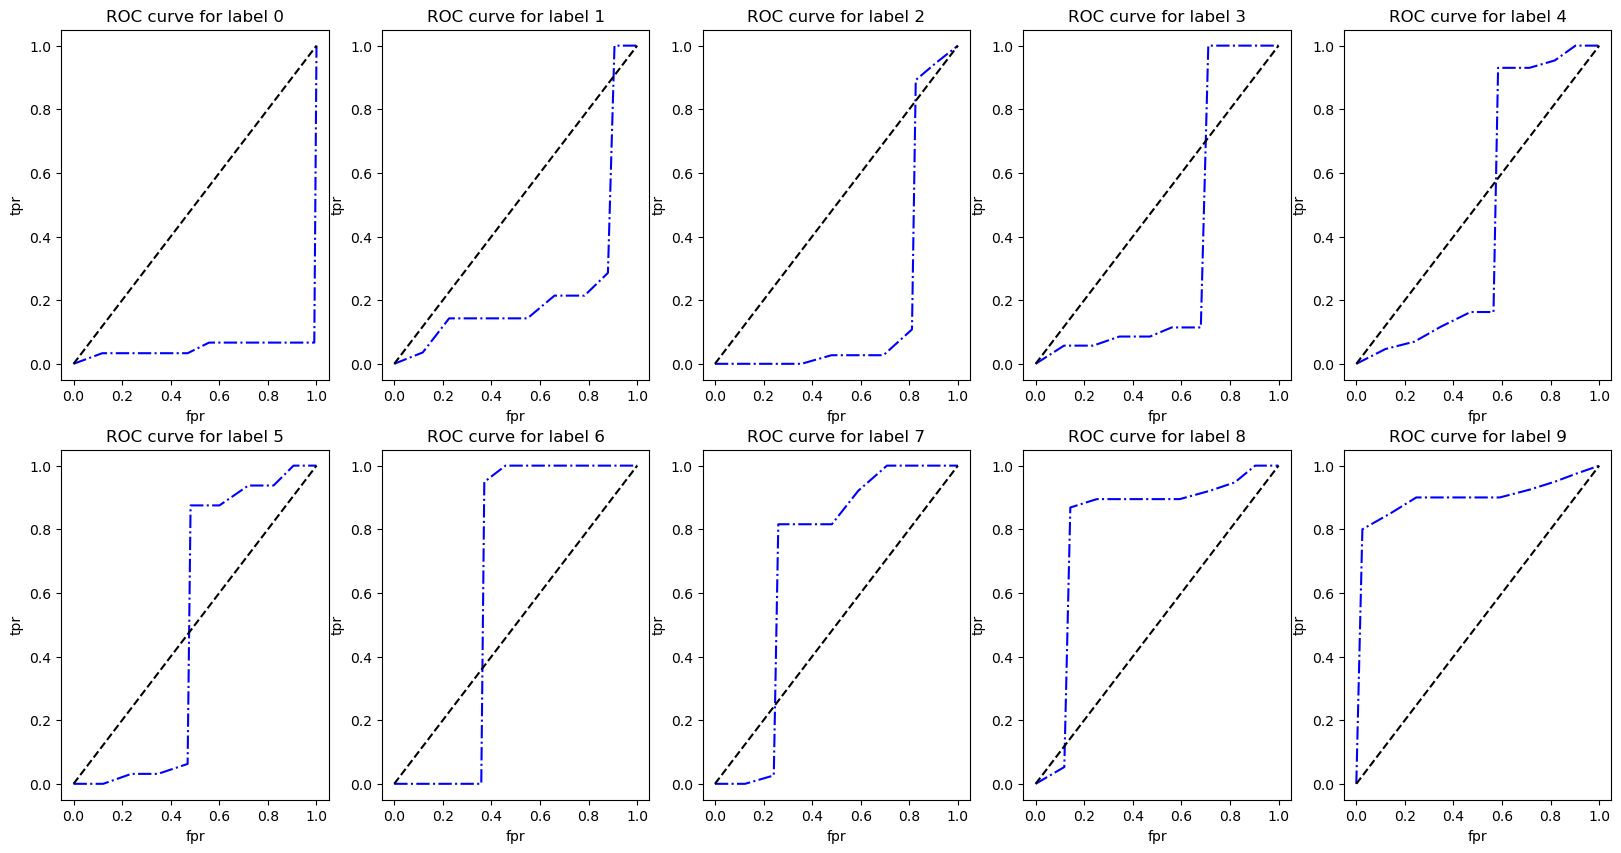

In [183]:
# roc curve
plt.subplots(2,5,figsize=(20,10))
for i,label in enumerate(np.unique(targets)):
    fpr,tpr,thresh = roc_curve(y_test,y_pred,pos_label=label)

    plt.subplot(2,5,i+1)
    plt.plot(fpr,tpr,ls='-.',color='b')
    plt.plot(np.linspace(0,1,2),np.linspace(0,1,2),ls='--',color='k')
    plt.title(f'ROC curve for label {label}')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
plt.show()